In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from numpy import mean
from skopt.utils import use_named_args

#
from sklearn.linear_model import ElasticNet

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error

In [2]:
dataset = pd.read_csv('./Dataset/dataset.csv')

features = ["Freq"]
targets = ["W", "L", "Lf", "Lg", "X_g","Wg"]
# targets = ["W", "L", "Lf"]
x = dataset[features]
y = dataset[targets]

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [4]:
search_space = [Integer(1, 1000, name='max_iter'), Integer(2, 10, name='alpha')]
# search_space = [
#     Real(1e-5, 1e2, prior="log-uniform", name="alpha"),       
#     Real(0.0, 1.0, prior="uniform", name="l1_ratio"),         
#     Integer(500, 5000, name="max_iter"),                       
#     Real(1e-6, 1e-2, prior="log-uniform", name="tol"),         
#     Categorical([True, False], name="fit_intercept"),          
#     Categorical(["auto", False], name="precompute"),           
#     Categorical(["cyclic", "random"], name="selection"),       
#     Categorical([True, False], name="positive"),               
# ]

In [5]:
@use_named_args(search_space)
def evaluate_model(**params):
    model = ElasticNet(max_iter=params['max_iter'], alpha=params['alpha'])
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    error = mean((y_test - y_pred) ** 2)  # MSE
    return error

In [6]:
result = gp_minimize(evaluate_model, search_space)

c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1000, 2] before, using random point [579, 4]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1000, 2] before, using random point [752, 5]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 2] before, using random point [196, 10]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1000, 2] before, using random point [114, 7]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserW

In [7]:
best_max_iter = result.x[0]
best_alpha = result.x[1]
best_model = ElasticNet(max_iter=best_max_iter, alpha=best_alpha)
best_model.fit(x_train_scaled, y_train)


ElasticNet(alpha=2, max_iter=74)

In [9]:
new_dataset = pd.read_csv('./Dataset/dataset.csv')  
new_data = new_dataset["Freq"].values.reshape(-1, 1)  # 

new_data_scaled = scaler.transform(new_data)

y_pred = best_model.predict(x_test_scaled)

c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: max_iter=%d, alpha=%.2f' % (result.x[0], result.x[1]))

print("Predictions:", y_pred)

Best Accuracy: -389.353
Best Parameters: max_iter=74, alpha=2.00
Predictions: [[42.43158908 25.85807561 16.95988005  5.57136751  5.24022891  3.01808064]
 [69.37379514 36.18104699 16.95988005  5.73258945  5.24022891  3.01808064]
 [67.00420875 35.27313423 16.95988005  5.71840986  5.24022891  3.01808064]
 ...
 [50.52372772 28.95859809 16.95988005  5.6197908   5.24022891  3.01808064]
 [17.23103053 16.20242069 16.95988005  5.42056757  5.24022891  3.01808064]
 [64.49244613 34.31074631 16.95988005  5.70337949  5.24022891  3.01808064]]


In [11]:
new_data_scaled = scaler.transform(x_test)

y_pred = best_model.predict(new_data_scaled)

print('Giá trị dự đoán:', y_pred)

Giá trị dự đoán: [[42.43158908 25.85807561 16.95988005  5.57136751  5.24022891  3.01808064]
 [69.37379514 36.18104699 16.95988005  5.73258945  5.24022891  3.01808064]
 [67.00420875 35.27313423 16.95988005  5.71840986  5.24022891  3.01808064]
 ...
 [50.52372772 28.95859809 16.95988005  5.6197908   5.24022891  3.01808064]
 [17.23103053 16.20242069 16.95988005  5.42056757  5.24022891  3.01808064]
 [64.49244613 34.31074631 16.95988005  5.70337949  5.24022891  3.01808064]]


In [12]:
from sklearn import preprocessing
def regression_report(y_true, y_pred):
    y_pred = preprocessing.normalize(y_pred)
    y_true = preprocessing.normalize(y_true)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    explained_variance = explained_variance_score(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)

    # Mean Bias Deviation (MBD)
    mbd = np.mean(y_pred - y_true)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Symmetric Mean Absolute Percentage Error (sMAPE)
    smape = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100

    report = pd.DataFrame({
        'Metric': [
            'Mean Absolute Error (MAE)',
            'Mean Squared Error (MSE)',
            'Root Mean Squared Error (RMSE)',
            'R² Score',
            'Explained Variance Score',
            'Median Absolute Error',
            'Mean Bias Deviation (MBD)',
            'Mean Absolute Percentage Error (MAPE)',
            'Symmetric Mean Absolute Percentage Error (sMAPE)'
        ],
        'Gausians': [mae, mse, rmse, r2, explained_variance, median_ae, mbd, mape, smape]
    })

    return report

report = regression_report(y_test, y_pred)
print(report)

                                             Metric   Gausians
0                         Mean Absolute Error (MAE)   0.062046
1                          Mean Squared Error (MSE)   0.007390
2                    Root Mean Squared Error (RMSE)   0.085963
3                                          R² Score   0.320431
4                          Explained Variance Score   0.492899
5                             Median Absolute Error   0.057891
6                         Mean Bias Deviation (MBD)  -0.009995
7             Mean Absolute Percentage Error (MAPE)  29.643226
8  Symmetric Mean Absolute Percentage Error (sMAPE)  26.943406


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
pred_val = pd.DataFrame(y_pred)
# print(pred_val)
y_test = y_test.reset_index(drop=True)
true_val_W = y_test['W']
true_val_L = y_test['L']
true_val_Lf = y_test['Lf']

pred_val_W = pred_val[0]
pred_val_L = pred_val[1]
pred_val_Lf = pred_val[2]

result = pd.concat([y_test, pred_val], axis=1)

result['Err_W'] = y_test['W'] - pred_val[0]
result['Err_L'] = y_test['L'] - pred_val[1]
result['Err_Lf'] = y_test['Lf'] - pred_val[2]

print(result['Err_W'])

0     -20.181022
1       8.565830
2      -1.848475
3     -19.464624
4      40.000000
         ...    
204    -3.360149
205   -20.379806
206   -19.726028
207    -4.021053
208    -5.938508
Name: Err_W, Length: 209, dtype: float64


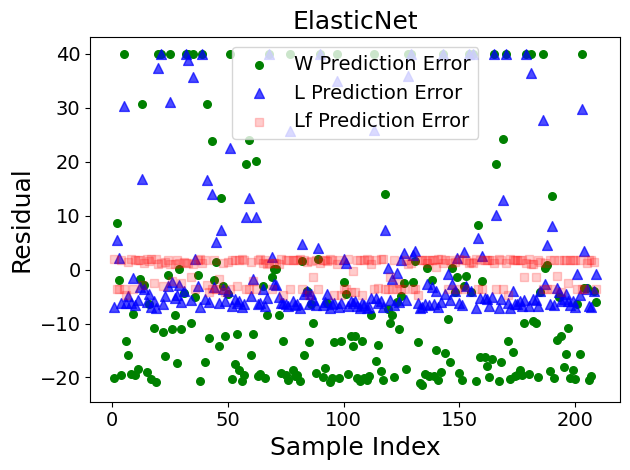

In [ ]:
sample_indices = list(range(1, len(true_val_W) + 1))

plt.scatter(sample_indices, result['Err_W'], label='W Prediction Error', color='green', s=30, alpha= 1, marker='o')
plt.scatter(sample_indices, result['Err_L'], label='L Prediction Error', color='blue', s=50, alpha= 0.7, marker='^')
plt.scatter(sample_indices, result['Err_Lf'], label='Lf Prediction Error', color='red', s=40, alpha= 0.2, marker='s')

plt.xlabel('Sample Index',fontsize=18)
plt.ylabel('Residual',fontsize=18)
plt.title('ElasticNet',fontsize=18)
# plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(np.arange(0, 210, 50),fontsize=14)
plt.yticks(np.arange(-20, 50, 10),fontsize=14)
# plt.xticks(sample_indices)
plt.tight_layout()
plt.show()